In [50]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/BP_data.csv"
df = pd.read_csv(url)
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [52]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [53]:
# 1. 결측치 많은 Pregnancy 컬럼 제거
df.drop(columns=["Pregnancy"], inplace=True)
# 2. 평균값으로 채우기 (또는 중앙값으로 대체해도 됨)
df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].mean(), inplace=True)
# 확인
print(df.isna().sum())

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64


<ipython-input-53-11e6c50d98e2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
<ipython-input-53-11e6c50d98e2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

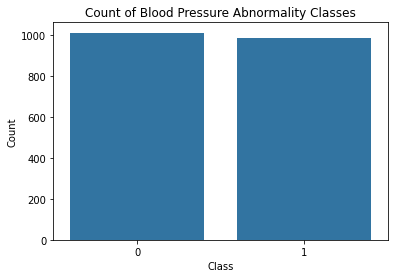

In [54]:
# countplot 그리기
sns.countplot(data=df, x='Blood_Pressure_Abnormality')
plt.title('Count of Blood Pressure Abnormality Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

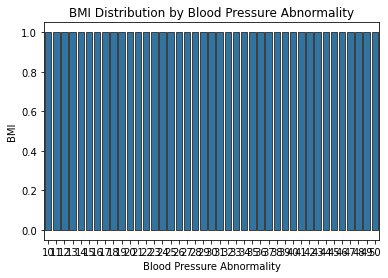

In [58]:
# Blood_Pressure_Abnormality 클래스별로 BMI 분포를 boxplot으로 시각화
sns.boxplot(data=df, y='Blood_Pressure_Abnormality', x='BMI')
plt.title('BMI Distribution by Blood Pressure Abnormality')
plt.xlabel('Blood Pressure Abnormality')
plt.ylabel('BMI')
plt.show()

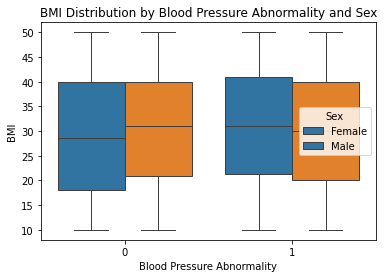

In [59]:

# 남녀 성별로 BMI 분포 비교
sns.boxplot(data=df, x='Blood_Pressure_Abnormality', y='BMI', hue='Sex')
plt.title('BMI Distribution by Blood Pressure Abnormality and Sex')
plt.xlabel('Blood Pressure Abnormality')
plt.ylabel('BMI')
plt.legend(title='Sex', labels=['Female', 'Male'])  # 0=Female, 1=Male 가정
plt.show()

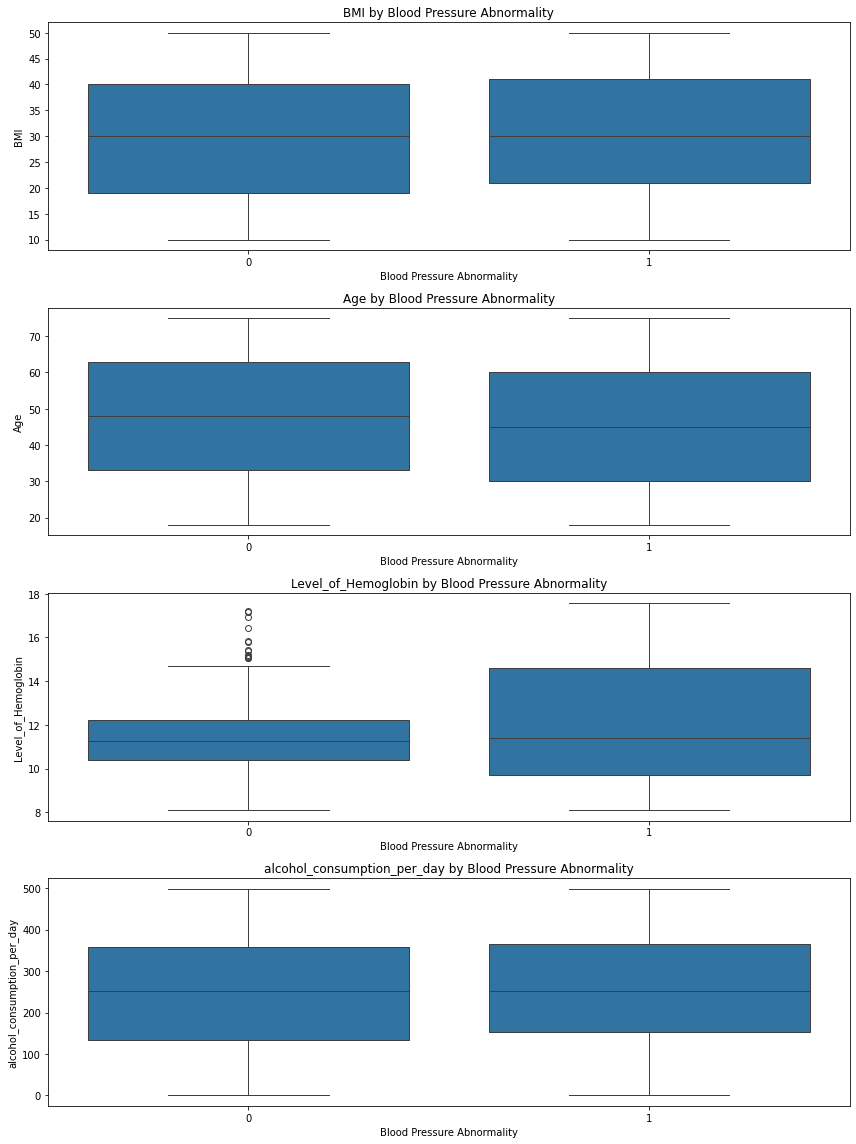

In [56]:
features = ['BMI', 'Age', 'Level_of_Hemoglobin', 'alcohol_consumption_per_day']
n = len(features)

plt.figure(figsize=(12, 4 * n))

for i, feature in enumerate(features):
    plt.subplot(n, 1, i+1)
    sns.boxplot(data=df, x='Blood_Pressure_Abnormality', y=feature)
    plt.title(f'{feature} by Blood Pressure Abnormality')
    plt.xlabel('Blood Pressure Abnormality')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


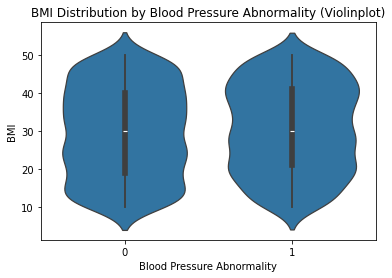

In [60]:
sns.violinplot(data=df, x='Blood_Pressure_Abnormality', y='BMI')
plt.title('BMI Distribution by Blood Pressure Abnormality (Violinplot)')
plt.xlabel('Blood Pressure Abnormality')
plt.ylabel('BMI')
plt.show()

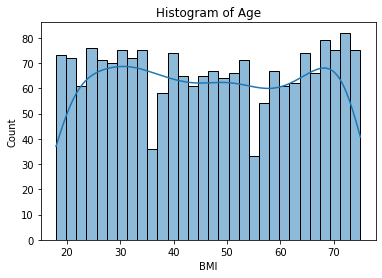

In [62]:

sns.histplot(data=df, x='Age', bins=30, kde=True)  # kde=True는 밀도곡선 추가
plt.title('Histogram of Age')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

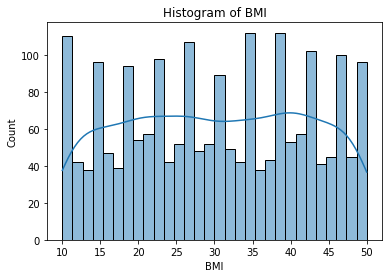

In [61]:

sns.histplot(data=df, x='BMI', bins=30, kde=True)  # kde=True는 밀도곡선 추가
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

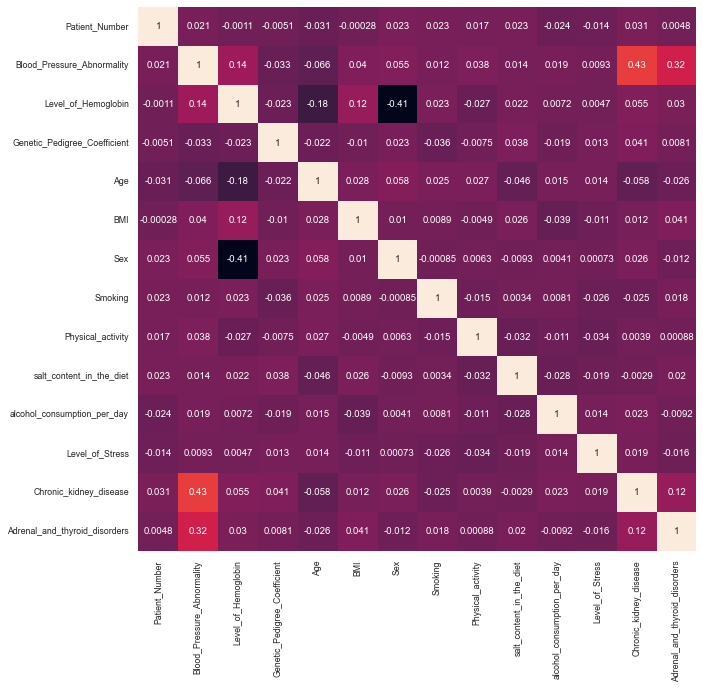

In [63]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# price와 높은 건  sqft_living

In [64]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Smoking',
       'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

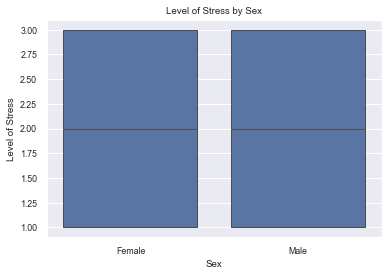

In [65]:
sns.boxplot(data=df, x='Sex', y='Level_of_Stress')
plt.title('Level of Stress by Sex')
plt.xlabel('Sex')
plt.ylabel('Level of Stress')
plt.xticks([0, 1], ['Female', 'Male'])  # 성별이 0,1로 되어있다고 가정
plt.show()

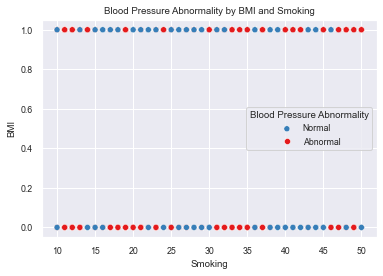

In [67]:
sns.scatterplot(
    data=df,
    x='BMI',
    y='Smoking',
    hue='Blood_Pressure_Abnormality',  # 색상으로 고혈압 여부 구분
    palette='Set1'  # 예쁜 컬러셋
)

plt.title('Blood Pressure Abnormality by BMI and Smoking')
plt.xlabel('Smoking')
plt.ylabel('BMI')
plt.legend(title='Blood Pressure Abnormality', labels=['Normal', 'Abnormal'])  # 0,1 가정
plt.grid(True)
plt.show()

In [68]:
# 데이터와 타겟 분리
X = df.drop('Blood_Pressure_Abnormality', axis=1).values
y = df['Blood_Pressure_Abnormality'].values


In [69]:
# 원-핫 인코딩(이진 분류이므로 생략)
#y = pd.get_dummies(y).values  #=> df일 때때
#y = to_categorical(y) # numpy 배열 일 때

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

unique, counts = np.unique(y_train, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"Class {int(cls)}: {cnt} samples ({cnt / len(y_train):.2%})")

Class 0: 805 samples (50.31%)
Class 1: 795 samples (49.69%)


In [70]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # BCEWithLogitsLoss expects (N, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600, 1]),
 torch.Size([400, 1]))

In [71]:
# 모델 정의
class BPClassifier(nn.Module):
    def __init__(self):
        super(BPClassifier, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(32, 16)
        #self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(16, 1) # Output 하나 (로짓)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        #x = torch.relu(self.fc4(x))
        x = self.fc5(x) # sigmoid는 BCEWithLogitsLoss가 내부적으로 처리
        return x

In [72]:
# Initialize the model, loss function, and optimizer
model = BPClassifier()
# pos_weight로 클래스 불균형 보정
pos_weight = torch.tensor([len(y_train) / y_train.sum() - 1])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [73]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            #_, predicted = torch.max(outputs.data, 1)
            probs = torch.sigmoid(outputs)
            predicted = (probs >= 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/30, Loss: 0.6880, Accuracy: 69.50%
Epoch 2/30, Loss: 0.6146, Accuracy: 75.25%
Epoch 3/30, Loss: 0.5371, Accuracy: 77.50%
Epoch 4/30, Loss: 0.5074, Accuracy: 80.00%
Epoch 5/30, Loss: 0.4833, Accuracy: 80.75%
Epoch 6/30, Loss: 0.4671, Accuracy: 82.00%
Epoch 7/30, Loss: 0.4433, Accuracy: 84.00%
Epoch 8/30, Loss: 0.4250, Accuracy: 85.75%
Epoch 9/30, Loss: 0.3894, Accuracy: 86.75%
Epoch 10/30, Loss: 0.3881, Accuracy: 87.00%
Epoch 11/30, Loss: 0.3762, Accuracy: 87.25%
Epoch 12/30, Loss: 0.3708, Accuracy: 89.00%
Epoch 13/30, Loss: 0.3545, Accuracy: 88.75%
Epoch 14/30, Loss: 0.3592, Accuracy: 90.00%
Epoch 15/30, Loss: 0.3334, Accuracy: 89.75%
Epoch 16/30, Loss: 0.3372, Accuracy: 89.00%
Epoch 17/30, Loss: 0.3467, Accuracy: 89.25%
Epoch 18/30, Loss: 0.3317, Accuracy: 90.25%
Epoch 19/30, Loss: 0.3169, Accuracy: 89.75%
Epoch 20/30, Loss: 0.3222, Accuracy: 90.00%
Epoch 21/30, Loss: 0.3101, Accuracy: 90.00%
Epoch 22/30, Loss: 0.3357, Accuracy: 90.25%
Epoch 23/30, Loss: 0.3036, Accuracy: 89.5

In [74]:
# 평가 지표 계산
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# 혼동 행렬 및 평가 지표
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)

# specificity 계산
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'\nConfusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')


Confusion Matrix:
[[189  19]
 [ 21 171]]
F1 Score: 0.90
Precision: 0.90
Recall: 0.89
Specificity: 0.90


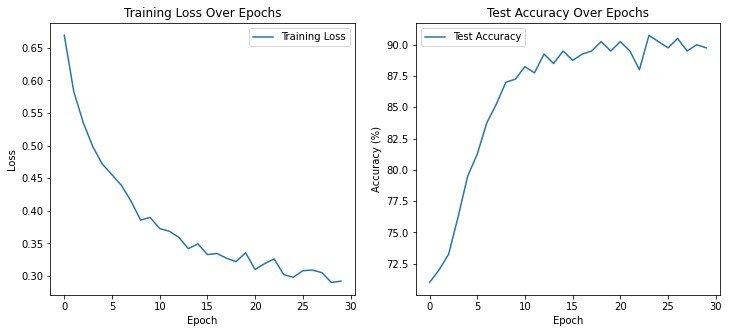

In [45]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()